### GB

In [27]:
import pandas as pd
import numpy as np
%pylab inline
from sklearn import tree
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, log_loss
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


/home/stas/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
data = pd.read_csv('HR.csv')

target = 'left'
class_names = ['stayed', 'left']
features = [c for c in data if c != target]
print(features)

X, y = data[features], data[target]


['last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']


In [29]:
y2 = list(map(lambda x: 1 if x > 0 else -1, y))

In [30]:
X.tail()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
14994,0.57,2,151,3,0,0
14995,0.48,2,160,3,0,0
14996,0.53,2,143,3,0,0
14997,0.96,6,280,4,0,0
14998,0.52,2,158,3,0,0


In [31]:
num_test = 0.178
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = num_test, random_state=42)

In [32]:
y_train.value_counts()

0    8058
1    4271
Name: left, dtype: int64

In [33]:
y_test.value_counts()

0    1763
1     907
Name: left, dtype: int64

__Бустинг__ - это метод построения композиций базовых алгоритмов с помощью последовательного добавления к текущей композиции нового алгоритма с некоторым коэффициентом.

Градиентный бустинг обучает каждый новый алгоритм так, чтобы он приближал антиградиент ошибки по ответам композиции на обучающей выборке. Аналогично минимизации функций методом градиентного спуска, в градиентном бустинге мы подправляем композицию, изменяя алгоритм в направлении антиградиента ошибки.

$L(y, z) = (y - z)^2$

$L'(y,z) = 2(y - z) = c*(y - z)$

In [67]:
def gbm_predict(X, base_algorithms_list, coefficients_list):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X.values]

In [160]:
clf_test = tree.DecisionTreeClassifier(max_depth = 5, random_state = 42)
clf_test.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [69]:
clf_test.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
clf_test.predict_proba(X_test[234:235])[0]

array([ 0.79882045,  0.20117955])

In [161]:
accuracy_score(y_test, clf_test.predict(X_test))

0.7681647940074906

In [73]:
clf_test = tree.DecisionTreeClassifier(max_depth = 5, random_state = 42)
clf_test.fit(X_train, y_train)
#gbm_predict(X_test, [clf_test], [0.0])

list(map(lambda x: 0 if x<=0.5 else 1, clf_test.predict(X_train)))

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [8]:
def gbm_predict(X, base_algorithms_list, coefficients_list):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X.values]
   # return list(map(lambda x: 1 if (1/(1 + np.exp(-x)) > 0.5) else 0, res))

In [ ]:
from sklearn.metrics import log_loss

log_loss(y_true, y_pred, eps=1e-15)

In [49]:
def logloss(true_label, predicted_prob):
    if true_label == 1:
        return -log(predicted_prob)
    else:
        return -log(1 - predicted_prob)

In [79]:
def logloss_diff(true, pred_prob, tau = 0.02):
    if true == 1:
        return tau / pred_prob
    else:
        return -tau /(1 - pred_prob)

In [91]:
base_algorithms = []
score_list = []
score2_list = []
coefficients = []


for i in range(100):
    clf = tree.DecisionTreeRegressor(max_depth = 5, random_state = 42)
    if i == 0:
        clf.fit(X, y)
        prediction = clf.predict(X)
    else:
        s = list(map(logloss_diff, y, prediction))
        clf.fit(X, s)
        prediction += clf.predict(X)
    
    base_algorithms.append(clf)
    coefficients.append(0.02)
    
    pred = []
    
    for i,j in zip(y, prediction):
        if 1 / (1 + exp(-j)) > 0.5:
            pred.append(1)
        else:
            pred.append(0)
    score = accuracy_score(y, pred)
   # pred = list(map(lambda x: 1 if 1/(1 + np.exp(-x)) > 0.5 else 0, gbm_predict(X, base_algorithms, coefficients)))
  #  score = np.mean(cross_val_score(clf, X, pred, cv=3, scoring='accuracy'))
#    score2 = accuracy_score(y_test, list(map(lambda x: 1 if (1/(1 + np.exp(-x)) > 0.5) else -1, gbm_predict(X_test, base_algorithms, coefficients))))
    print(i, "  :   ", score, "   ", prediction.max(), prediction.min())
    score_list.append(score)
   # score2_list.append(score2)

1   :    0.34628975265     1.0 0.0
1   :    0.346156410427     1.00714288067 -0.0234682714886
1   :    0.346223081539     1.02139941708 -0.0248105921281
1   :    0.347156477098     1.04211590463 -0.0341045120346
1   :    0.347156477098     1.0623959303 -0.0625088932964
1   :    0.347023134876     1.08122130362 -0.0719614493637
1   :    0.347023134876     1.09971890438 -0.0908507719005
1   :    0.346889792653     1.11790536995 -0.114683838614
1   :    0.346889792653     1.13579597191 -0.137844813568
1   :    0.34722314821     1.15340476829 -0.159732830897
1   :    0.34815654377     1.17074473476 -0.181099385274
1   :    0.349156610441     1.18782787799 -0.201980765216
1   :    0.349356623775     1.19497192403 -0.219996767698
1   :    0.350290019335     1.21170871893 -0.240064268574
1   :    0.350490032669     1.22821433591 -0.259729915997
1   :    0.350623374892     1.24449813867 -0.279017298216
1   :    0.352490166011     1.26056887384 -0.297947761578
1   :    0.352623508234     1.2764

Populating the interactive namespace from numpy and matplotlib


/home/stas/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


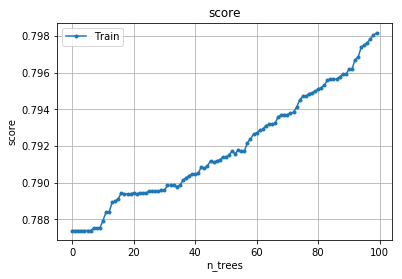

In [79]:
%pylab inline
pylab.plot(np.arange(0, 100, 1), score_list, marker='.', label='Train')
pylab.plot(np.arange(0, 100, 1), score2_list, marker='.', label='Test')
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('score')
pylab.legend(loc='upper left')

In [110]:
X_train[:10]

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
5375,0.97,4,186,3,0,0
9994,0.58,5,208,3,0,0
10497,0.93,6,225,4,0,0
11924,0.82,4,187,3,0,0
14054,0.61,3,266,2,0,0
4359,0.51,4,246,3,1,0
14557,1.00,4,253,5,0,0
8405,0.72,3,243,3,0,0
3522,0.89,3,160,2,0,0
11232,0.85,4,201,10,0,0


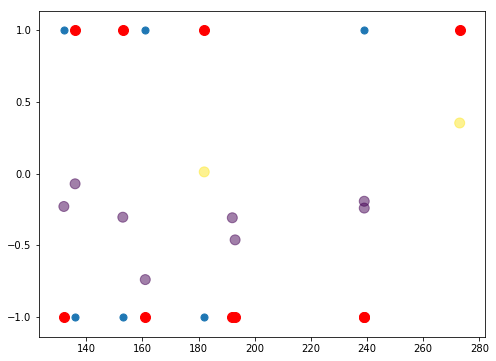

In [136]:
model = tree.DecisionTreeClassifier().fit(X_train, y_train)
pred = gbm_predict(X_test, base_algorithms, coefficients)
pylab.figure(figsize=(8, 6))
pylab.scatter(X_test.average_montly_hours[450:460], y_test[450:460], s = 50)
pylab.scatter(X_test.average_montly_hours[450:460], model.predict(X_test)[450:460], c = 'red', s = 100)
pylab.scatter(X_test.average_montly_hours[450:460], pred[450:460], c = list(map(lambda x: 1 if x > 0 else -1,pred[450:460])), alpha=0.5, s = 100)

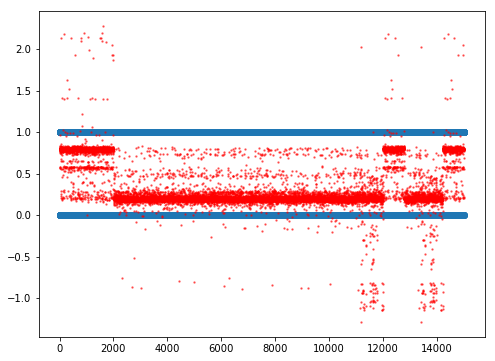

In [82]:
pylab.figure(figsize=(8,6))
pylab.scatter(range(len(y)), y)
pylab.scatter(range(len(y)), prediction, c='r', alpha=0.5, s= 2)

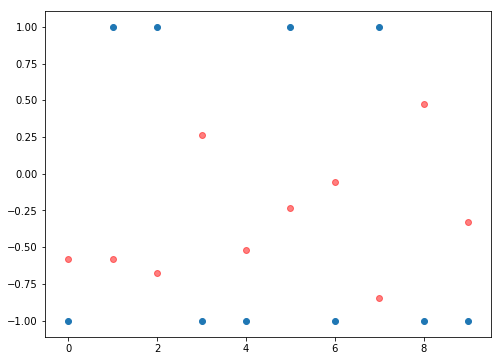

In [103]:
pylab.figure(figsize=(8,6))
pylab.scatter(range(10), y_test[:10] )
pylab.scatter(range(10), gbm_predict(X_test, base_algorithms, coefficients)[:10] ,c='r', alpha=0.5)